<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/MNIST_Handwritten_Digital_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:

Dataset --> image processing (resizing all the images to a common dimensions, RGB2Gray) --> Train Test Split --> Neural Network --> Trained Neural Network --> New Image --> Hnadwritten digit Prediction 

**MNIST Handwritten Digital Classification using deep Learning (Neural Network)**

Importing the dependencies

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#OpenCV
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
# Now importing the deep learning libraries that we need 
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the mnist data from keras.datasets

In [100]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [101]:
type(X_train)

numpy.ndarray

In [102]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data =  60000 images

Test data = 10000 images

Image dimesion = 28*28

Grayscale image --> 1 Channel

In [103]:
#printing the 10th image 
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [104]:
print(X_train[10].shape)

(28, 28)


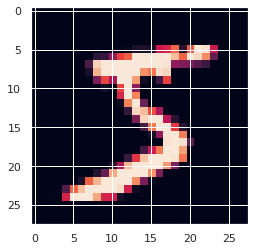

5


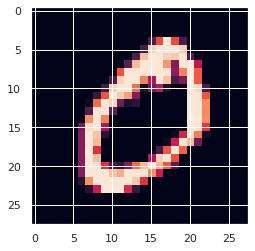

0


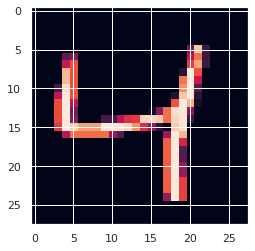

4


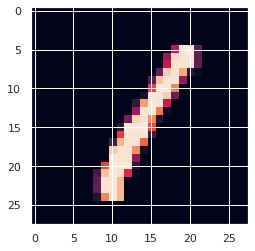

1


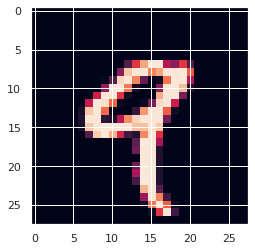

9


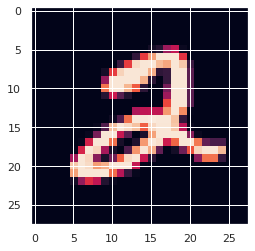

2


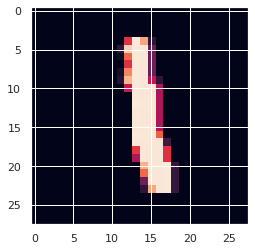

1


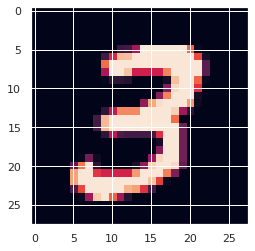

3


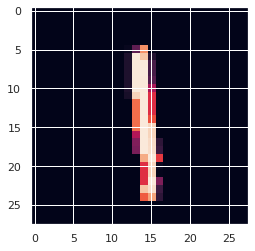

1


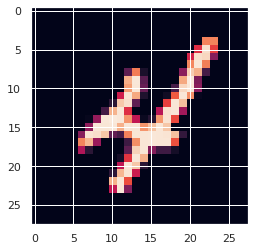

4


In [105]:
#display image
for i in range (10):
  plt.imshow(X_train[i])
  plt.show()
  print(Y_train[i])


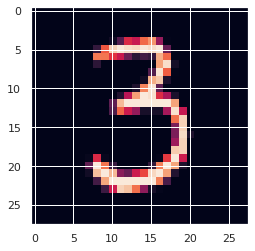

3


In [106]:
plt.imshow(X_train[50])
plt.show()

# Print the corresponding label
print(Y_train[50])

Image labels

In [107]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [108]:
#Unique Values in Y_train
print(np.unique(Y_train))

#Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also applu one hot encoding

All the images have the same dimension in this dataset that is 28 * 28

and if it is not is the same shape, we have to  resize the images to a common dimension

In [109]:
#Scaling the values

X_train = X_train/255
X_test = X_test/255

In [110]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [111]:
# setting up layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   #10 is the number of classes that we have in labels

])

In [112]:
#compiling the neural netowrk
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [113]:
#Training the Neural Network
model.fit(X_train,Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

Training data accuracy is : 98.9%


**Accuracy on test data**

In [114]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710
0.9710000157356262


Test data accuracy : 97.1%

So our model does not overfit

In [115]:
print(X_test.shape)

(10000, 28, 28)


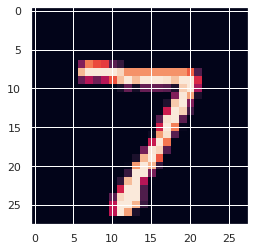

In [116]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [117]:
print(Y_test[0])

7


In [118]:
Y_pred = model.predict(X_test)

In [119]:
print(Y_pred.shape)

(10000, 10)


In [120]:
print(Y_pred[0])

[3.5130084e-03 6.7106444e-01 6.6638464e-01 8.5868883e-01 6.2501094e-05
 9.0813637e-04 4.0907306e-08 9.9999774e-01 1.3417095e-02 6.5949798e-02]


model.predict() gives the prediciton probability of each class for that particular data point.

In [121]:
#converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [122]:
#converting the prediciton probability to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [123]:
print(Y_pred)

[[3.5130084e-03 6.7106444e-01 6.6638464e-01 ... 9.9999774e-01
  1.3417095e-02 6.5949798e-02]
 [1.4623702e-03 9.8551810e-01 9.9999803e-01 ... 8.7179070e-10
  9.9594283e-01 2.8698874e-09]
 [3.2803416e-04 9.9889880e-01 1.9822419e-02 ... 1.7416507e-02
  8.2349467e-01 3.1207800e-03]
 ...
 [7.6076623e-07 2.1074546e-05 1.1165320e-04 ... 5.3507298e-02
  2.6697814e-03 5.0617886e-01]
 [3.9582705e-05 3.1402707e-04 3.5408437e-03 ... 6.9005787e-03
  9.9133873e-01 6.4516068e-04]
 [1.0095924e-02 1.2965620e-02 4.6259880e-02 ... 3.3845839e-07
  1.4659762e-04 5.2905436e-10]]


Y_test -->  True Labels

Y_pred_labels --> predicted labels



Confusion matrix

In [124]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [125]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 39.5, 'predicted label')

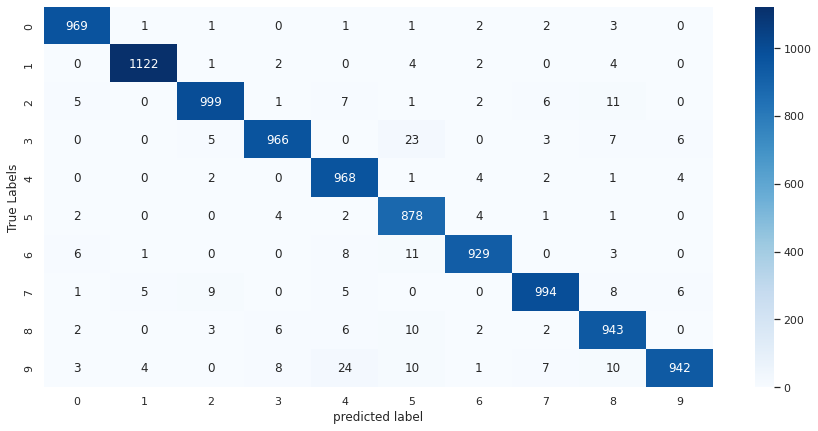

In [126]:
sns.set()
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('predicted label')

Builidng a predictive system

In [141]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread('/content/MNIST_digit.png')

In [142]:
type(input_image)

numpy.ndarray

In [143]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


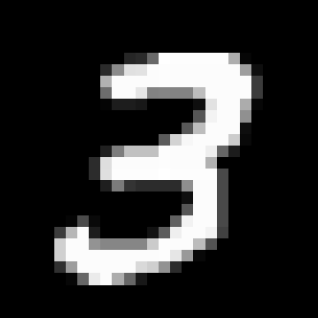

In [144]:
cv2_imshow(input_image)

In [145]:
input_image.shape

(318, 318, 3)

In [146]:
#converting image to grayscale
grayscale =  cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [147]:
grayscale.shape

(318, 318)

In [148]:
#Image resizing from 509,612 to 28,28
input_image_resize = cv2.resize(grayscale,(28,28))

In [149]:
input_image_resize.shape

(28, 28)

In [150]:
cv2_imshow(input_image_resize)

In [151]:
input_image_resize = input_image_resize/255

In [152]:
#The reason for doing this is i am going to tell the neural netwrok
#that is going to predict the value for only one image.
image_reshape = np.reshape(input_image_resize, [1,28,28])
#if we are doing for RGB image
#image_reshape = np.reshape(input_image_resize, [1,28,28,3])

In [153]:
input_prediction = model.predict(image_reshape)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

[[5.9389083e-10 9.4131142e-02 1.9494593e-03 1.0000000e+00 4.7541544e-08
  6.3185507e-01 2.8182675e-13 2.7394295e-04 9.5208365e-01 4.5282638e-01]]
3


Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


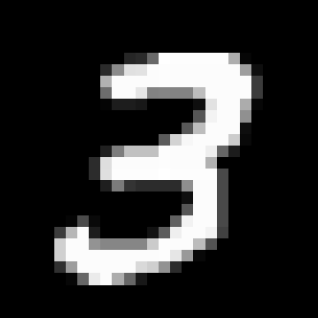

The hand writtwen digit is recognized as  3


In [157]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_imag_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,28,28])

input_prediciton = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print('The hand writtwen digit is recognized as ',input_pred_label)